<a href="https://colab.research.google.com/github/123prashanth123/Fault-Detection-System/blob/Colabs/Semantic%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import models, transforms
from IPython.display import clear_output

seed = 0

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])
colors = np.array([(0, 0, 0), (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128), 
                   (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0), 
                   (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
                   (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])



def decode(class_index_image=None, colors=None, num_classes=21):
    r, g, b = np.zeros(class_index_image.shape, dtype=np.uint8), np.zeros(class_index_image.shape, dtype=np.uint8), np.zeros(class_index_image.shape, dtype=np.uint8)
    for i in range(num_classes):
        indexes = (class_index_image == i)
        r[indexes] = colors[i][0]
        g[indexes] = colors[i][0]
        g[indexes] = colors[i][0]
    return np.stack([r, g, b], axis=2)



def preprocess_segmenter(image, change_color_space=True):
    if change_color_space:
        image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2RGB)
    image = cv2.resize(src=image, dsize=(592, 592), interpolation=cv2.INTER_AREA)
    h, w, _ = image.shape
    cx, cy = w // 2, h // 2
    return image[cy - 260:cy + 260, cx - 260:cx + 260, :]



def show(image1=None, image2=None):
    assert(image1 is not None and image2 is not None)
    plt.figure(figsize=(16, 9))
    plt.subplot(1, 2, 1)
    plt.imshow(image1, cmap="gnuplot2")
    plt.axis("off")
    plt.title("Original")
    plt.subplot(1, 2, 2)
    plt.imshow(image2, cmap="gnuplot2")
    plt.axis("off")
    plt.title("Segmented")
    plt.show()

In [3]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.model = models.segmentation.deeplabv3_mobilenet_v3_large(pretrained=True, progress=True)
    
    def forward(self, x):
        return self.model(x)

model = Model().to(device)
model.eval()

clear_output()

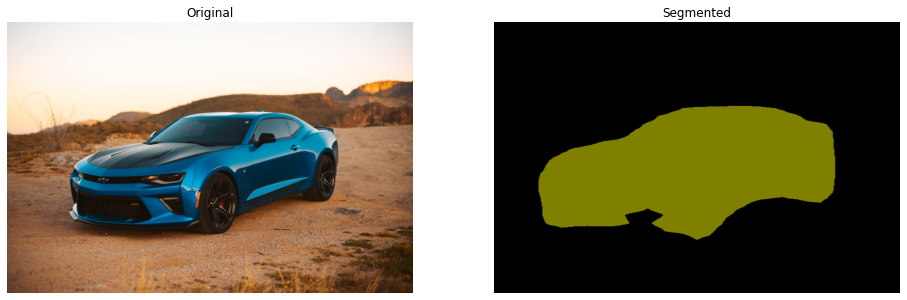

In [4]:
name = "car.jpg"
image = cv2.imread("/content/" + name, cv2.IMREAD_COLOR)

disp_image = cv2.cvtColor(src=image.copy(), code=cv2.COLOR_BGR2RGB)
h, w, _ = disp_image.shape
image = preprocess_segmenter(image, True)


with torch.no_grad():
    output = model(transform(image).to(device).unsqueeze(0))["out"]


class_index_image = torch.argmax(output[0], dim=0)
segmented_image = cv2.resize(src=decode(class_index_image=class_index_image, colors=colors), dsize=(w, h), interpolation=cv2.INTER_AREA)

show(disp_image, segmented_image)

In [5]:
print(np.unique(class_index_image.detach().cpu().numpy()))

[0 7]
